<a href="https://colab.research.google.com/github/Yashgg10/EDA/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***EDA1***

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df.shape

(1061, 7)

In [ ]:
range = df['selling_price'].max() - df['selling_price'].min()
range

755000

In [ ]:
df['selling_price'].median()

45000.0

In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
df[df['km_driven'] >= 50000].shape[0]

207

In [ ]:
df['owner'].value_counts()

,count
owner,
1st owner,924
2nd owner,123
3rd owner,11
4th owner,3


In [ ]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
df[df['year'] <= 2015].shape[0]/df.shape[0]

0.5664467483506126

In [ ]:
dcnt = pd.DataFrame(df.isnull().sum(), columns=['missing_vals'])
dcnt

,missing_vals
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


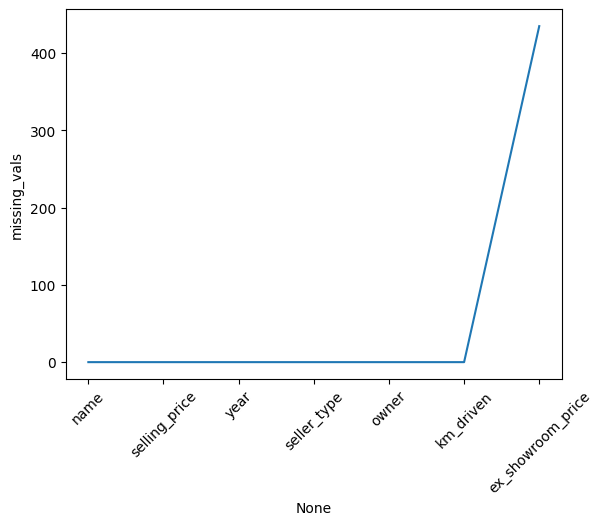

In [ ]:
sns.lineplot(x = dcnt.index, y='missing_vals', data=dcnt)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[df['selling_price'] == df['selling_price'].max()]['name']

,name
295,Suzuki GSX S750


In [ ]:
df.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


In [ ]:
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

<Axes: xlabel='km_driven', ylabel='selling_price'>

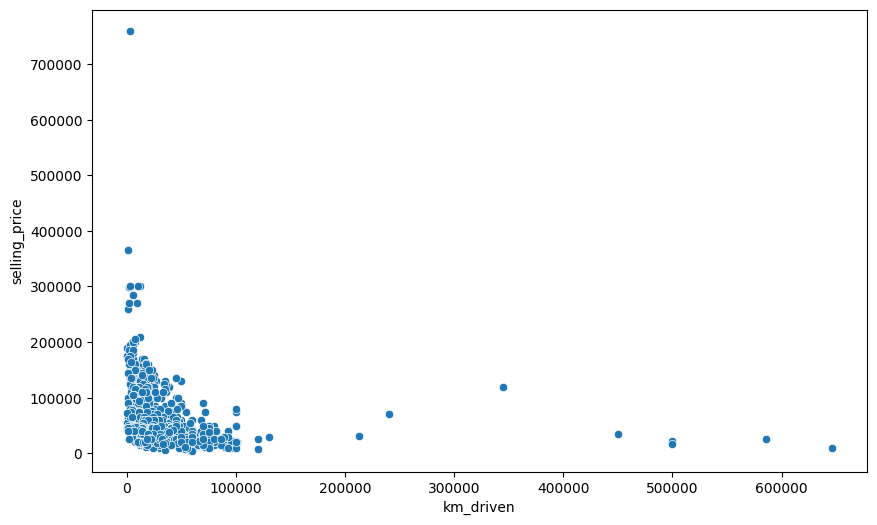

In [ ]:
data = df[df['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=data)

<Axes: ylabel='km_driven'>

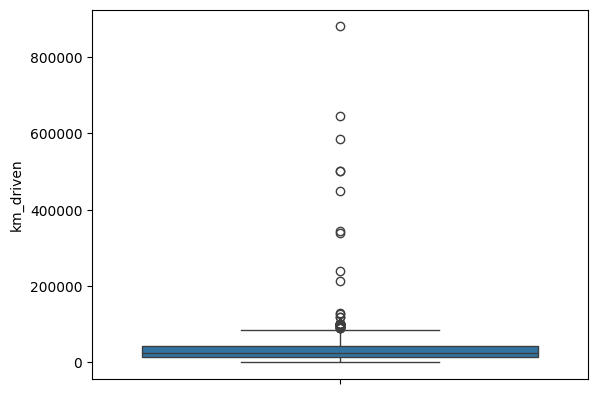

In [ ]:
sns.boxplot(df['km_driven'])

In [ ]:
#  Identify and remove outliers in the km_driven column using the IQR method
Q1, Q3 = df['km_driven'].quantile([0.25, 0.75])
Q1, Q3
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound
df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
91,Honda Activa [2000-2015],22989,2012,Individual,1st owner,500000,50267.0
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
115,Hero Honda Passion Plus,7500,2004,Individual,1st owner,120000,NaN
135,Hero Honda CBZ extreme,20000,2007,Individual,1st owner,90000,NaN
154,Hero Xtreme Sports,22000,2014,Individual,1st owner,99000,78350.0
184,Honda CB Unicorn 160,75000,2015,Individual,1st owner,100000,79233.0
363,Hero Honda CD100SS,10000,1997,Individual,1st owner,646000,NaN
470,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0
474,Hero Honda Passion PRO [2012],12000,2012,Individual,1st owner,90000,NaN
477,Honda Activa [2000-2015],25000,2009,Individual,1st owner,585659,50267.0


In [ ]:
df_copy = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
df_copy

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


In [ ]:
catcols = []
for x in df.columns:
    if df[x].dtype == 'object':
        catcols.append(x)
catcols

['name', 'seller_type', 'owner']

In [ ]:
numcols = []
for x in df.columns:
    if df[x].dtype != 'object':
        numcols.append(x)
numcols

['selling_price', 'year', 'km_driven', 'ex_showroom_price']

In [ ]:
df_nums = df[numcols]
df_nums

,selling_price,year,km_driven,ex_showroom_price
0,175000,2019,350,NaN
1,45000,2017,5650,NaN
2,150000,2018,12000,148114.0
3,65000,2015,23000,89643.0
4,20000,2011,21000,NaN
...,...,...,...,...
1056,17000,2010,500000,52000.0
1057,16000,2012,33000,51000.0
1058,15000,2013,35000,57000.0
1059,12000,2009,53000,58000.0


<Axes: >

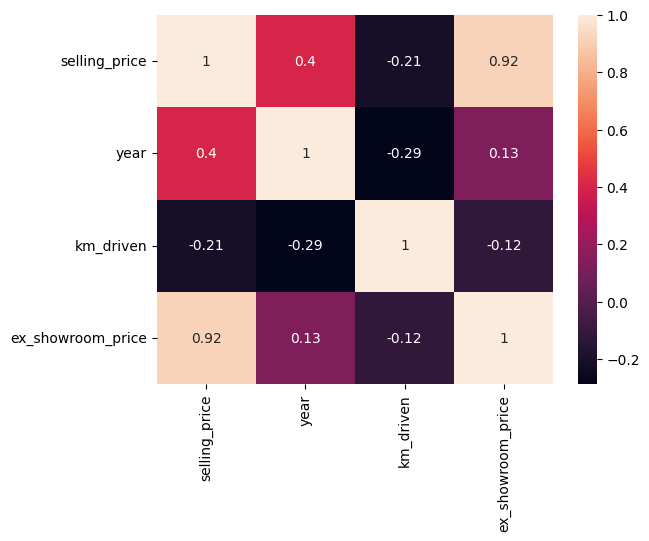

In [ ]:
sns.heatmap(df_nums.corr(), annot=True)

In [ ]:
df['bike_age'] = df['year']
for i in df['year']:
  df['bike_age'] = df['bike_age'].replace(i, 2024-i)
df['bike_age']

,bike_age
0,5
1,7
2,6
3,9
4,13
...,...
1056,14
1057,12
1058,11
1059,15


In [ ]:
df.groupby('bike_age')['selling_price'].mean()

,selling_price
bike_age,
4,183333.333333
5,119689.511628
6,87660.374046
7,78894.736842
8,58469.018692
9,56500.000000
10,48668.131868
11,51136.986301
12,35748.400000


In [ ]:
df[df['selling_price'] > df.groupby('year')['selling_price'].transform('mean')]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,5
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,6
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,9
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,16
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,5
...,...,...,...,...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,8
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,10
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,12
1012,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0,10


<Axes: xlabel='year', ylabel='selling_price'>

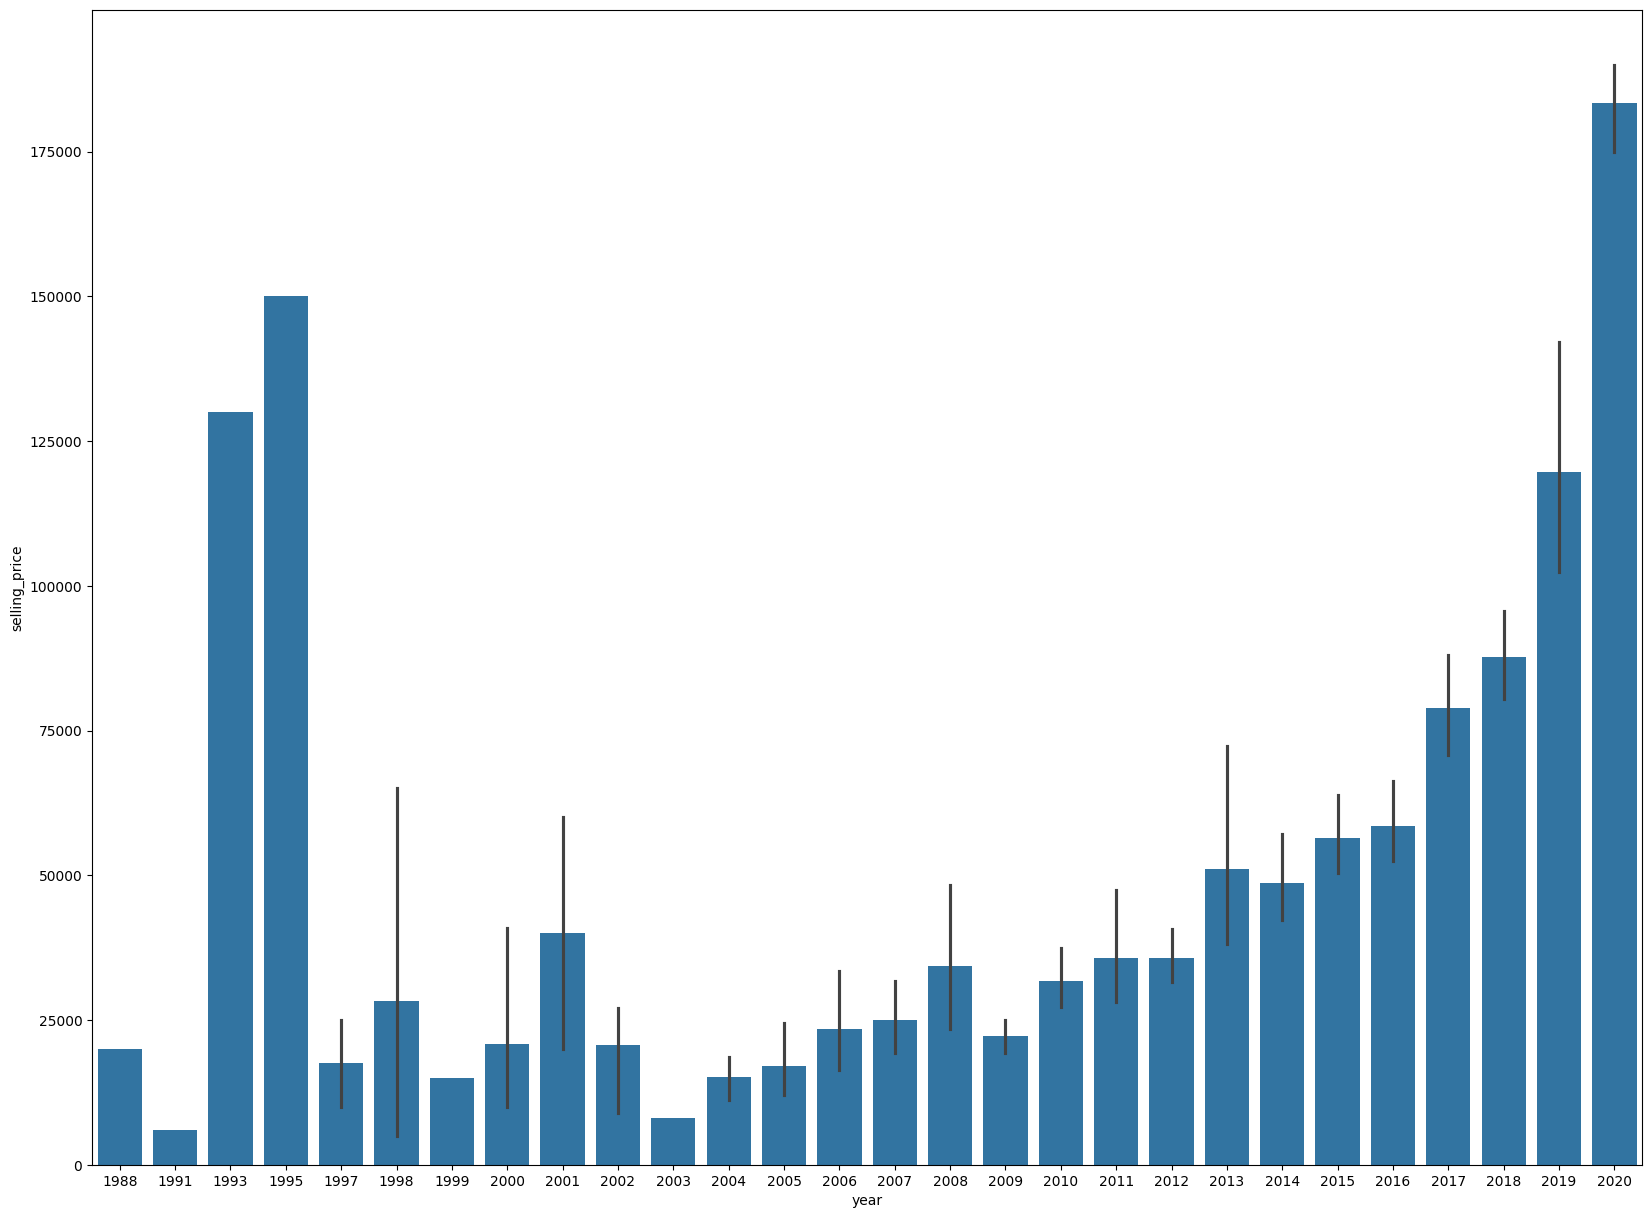

In [ ]:
plt.figure(figsize=(20, 15))
sns.barplot(x=df['year'], y=df['selling_price'], data=df)